<a href="https://colab.research.google.com/github/dhairyachandra/KDM_Spring_2021/blob/main/ICP_12/ICP12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance yahoofinancials


     |████████████████████████████████| 5.5MB 22.7MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=226c392b1df842d7649e1fc04bd1711a41b5c6996e33654a024e1773fecb5ad0
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-cp37-none-any.whl size=15192 sha256=228d98a06df7f546e29b89d589d4c5e825cfbddc38b9ce68656602be880db2ed
  Stored in directory: /root/.cache/pip/wheels/d9/7e/cf/4977a8572d5247242a4b13018d1d36923024ba84236e0d28bc
Successfully built yfinance yahoofinancials
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
#importing libraries

import numpy as np
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

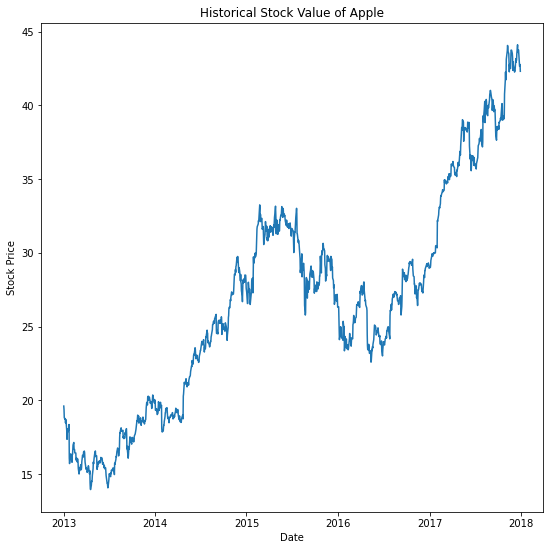

In [14]:
#Here set stock training start and end date

raw_data = yf.download('AAPL',
                      start='2013-1-1',
                      end='2017-12-31', 
                      progress=False)

#plotting
plt.figure(figsize=(9,9))
plt.plot(raw_data['Close'])
plt.title('Historical Stock Value of Apple')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [4]:
#preprocessing
raw_data['Date'] = raw_data.index
req_data = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
req_data['Date'] = raw_data['Date']
req_data['Open'] = raw_data['Open']
req_data['High'] = raw_data['High']
req_data['Low'] = raw_data['Low']
req_data['Close'] = raw_data['Close']

In [5]:
train_set = req_data.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1259):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_train.shape


(1199, 60, 1)

In [6]:
#LSTM Recurrent Model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [7]:
#fitting the model
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 30, batch_size = 16)

Epoch 1/30
75/75 [==============================] - 36s 13ms/step - loss: 0.0812
Epoch 2/30
75/75 [==============================] - 1s 12ms/step - loss: 0.0330
Epoch 3/30
75/75 [==============================] - 1s 12ms/step - loss: 0.0186
Epoch 4/30
75/75 [==============================] - 1s 12ms/step - loss: 0.0069
Epoch 5/30
75/75 [==============================] - 1s 12ms/step - loss: 0.0054
Epoch 6/30
75/75 [==============================] - 1s 13ms/step - loss: 0.0046
Epoch 7/30
75/75 [==============================] - 1s 12ms/step - loss: 0.0045
Epoch 8/30
75/75 [==============================] - 1s 12ms/step - loss: 0.0055
Epoch 9/30
75/75 [==============================] - 1s 12ms/step - loss: 0.0044
Epoch 10/30
75/75 [==============================] - 1s 12ms/step - loss: 0.0051
Epoch 11/30
75/75 [==============================] - 1s 12ms/step - loss: 0.0047
Epoch 12/30
75/75 [==============================] - 1s 12ms/step - loss: 0.0041
Epoch 13/30
75/75 [=================

In [9]:
#Fetching the test data and preprocessing
test_raw_data = yf.download('AAPL',
                      start='2018-1-1',
                      end='2019-1-1', 
                      progress=False)

test_raw_data['Date'] = test_raw_data.index
test_data = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
test_data['Date'] = test_raw_data['Date']
test_data['Open'] = test_raw_data['Open']
test_data['High'] = test_raw_data['High']
test_data['Low'] = test_raw_data['Low']
test_data['Close'] = test_raw_data['Close']
real_stock_price = test_data.iloc[:, 4:5].values
dataset_total = pd.concat((req_data['Open'], test_data['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values
inputs = sc.transform(inputs.reshape(-1,1))
X_test = []
for i in range(60, 300):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

X_test.shape


(240, 60, 1)

In [10]:
#predicting
prediction = model.predict(X_test)
prediction = sc.inverse_transform(prediction)


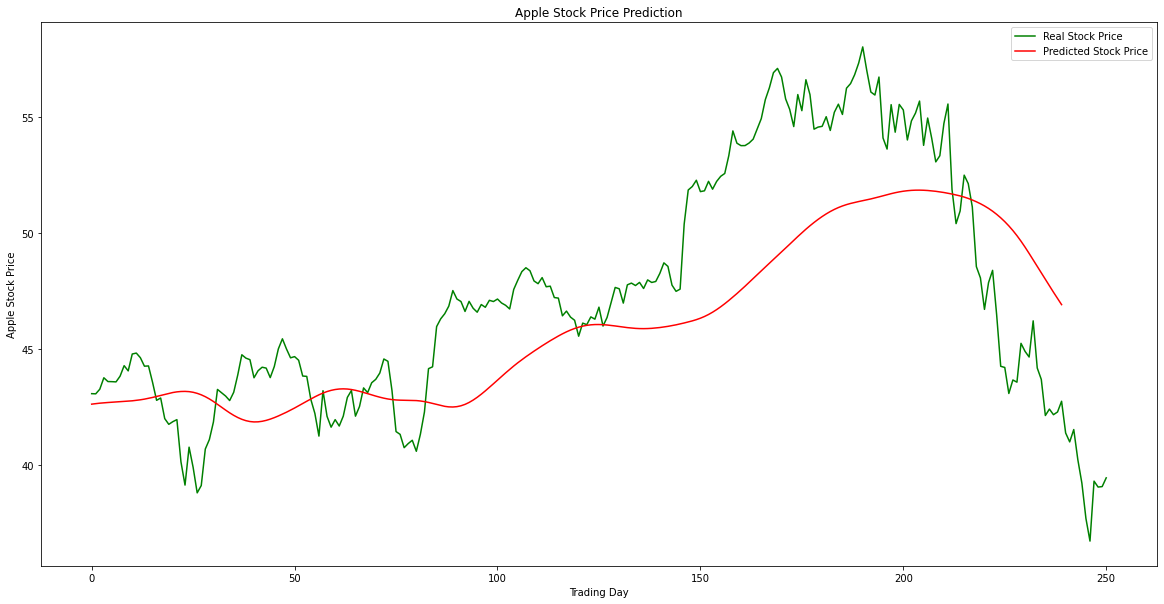

In [13]:
#Plotting
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'Real Stock Price')
plt.plot(prediction, color = 'red', label = 'Predicted Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()